# Start
Not using comet.ai or w&b - because they require a sign up
Will use mlflow  - as I already have code for it. 


### Use code from:
https://learn.microsoft.com/en-us/azure/databricks/_extras/notebooks/source/mlflow/mlflow-pytorch-training.html

Note the AI speech recognition code doesn't add much:
https://www.assemblyai.com/blog/end-to-end-speech-recognition-pytorch/

Maybe I just need to add:
device agnostic code
early stopping condition
Other metrics (precision, recall, f1)

Then use the mlflow + tensor board code. 


In [11]:
#load data
# from generate_training_data import *
# background_filepath =  'speech_commands_v0.02.tar/_background_noise_/doing_the_dishes.wav'
# sample_time = 10
# resample_rate = 16000 #think I want to change this to 16k - the original rate
# number_samples = 100
# folder_trigger_word = 'speech_commands_v0.02.tar/nine/'
# folder_negative_word = 'speech_commands_v0.02.tar/backward/'
# outpath_location = 'data'

# val = Create_Test_Train_Data(background_filepath, sample_time,resample_rate,number_samples, folder_trigger_word,folder_negative_word,outpath_location)

# val.generate_all()

In [12]:
%run train_func

input shape: (1,151,801)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 1, 197]           2,266
               GRU-2  [[-1, 1, 1375], [-1, 2, 1375]]               0
            Linear-3              [-1, 1, 1375]       1,892,000
           Sigmoid-4                 [-1, 1375]               0
Total params: 1,894,266
Trainable params: 1,894,266
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.46
Forward/backward pass size (MB): 28.83
Params size (MB): 7.23
Estimated Total Size (MB): 36.51
----------------------------------------------------------------
Epoch [1] loss: 0.32495999336242676, learning rate [0.0004], training accuracy cutoff (0.1): 0.52321, average label 0.05394
              Test for Epoch [1], accuracy,precision,recall (0.24982,0.05428,0.38363), average label 0.05436
Epoch [2] loss: 0.33720999956

0.8909090909090909


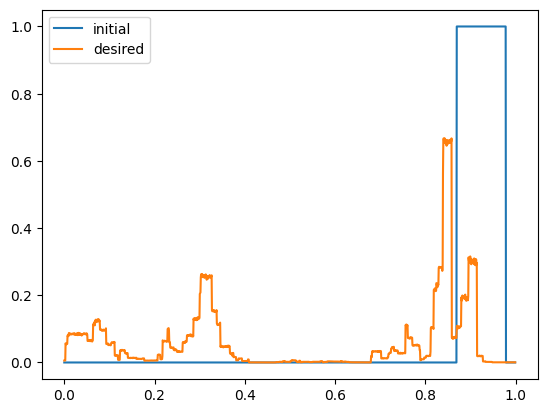

In [26]:
data = testloader[-8]

inputs, labels_og = data

labels =  resize_label(labels_og, args.label_time)

out = model(inputs)

print(get_accuracy(labels, out,cutoff=0.8))

#plot 
plot_new_vs_old_label(labels,out.detach().numpy())

tensor(1.)

150
0.9047272727272727


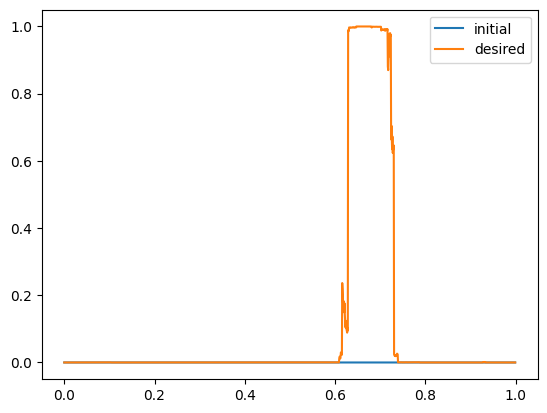

151
1.0


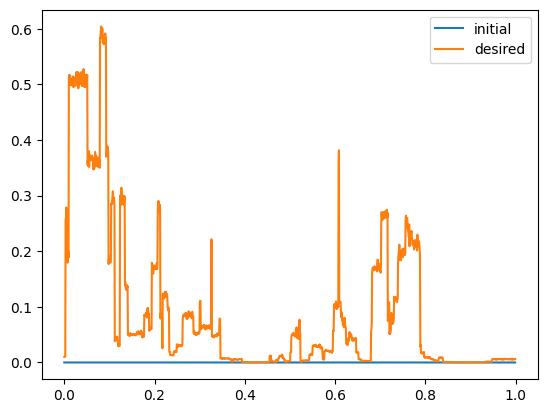

152
0.8989090909090909


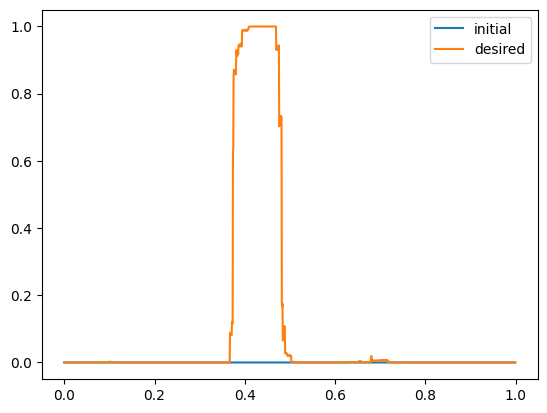

153
0.9949090909090909


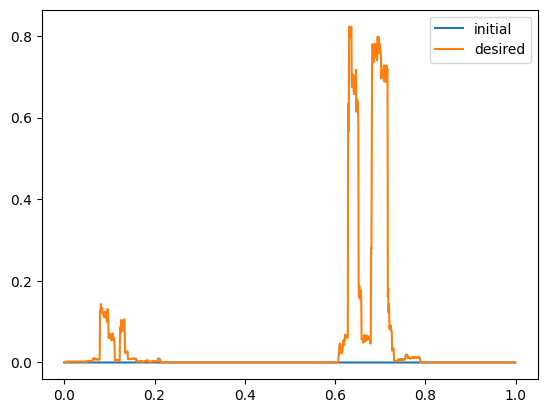

154
1.0


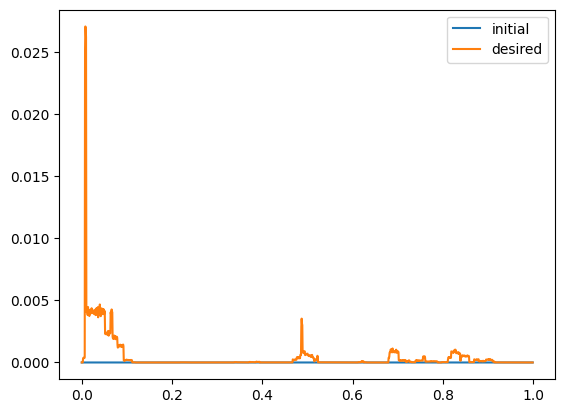

155
0.9854545454545455


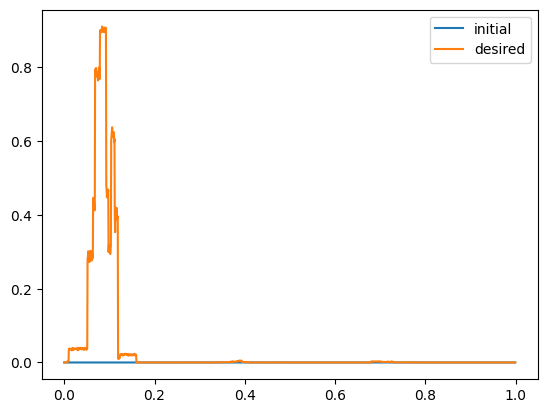

156
0.8916363636363637


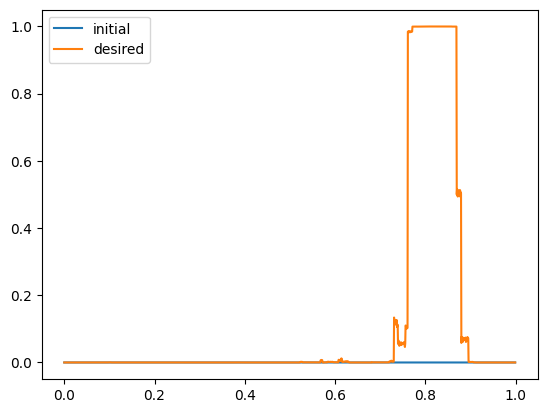

157
1.0


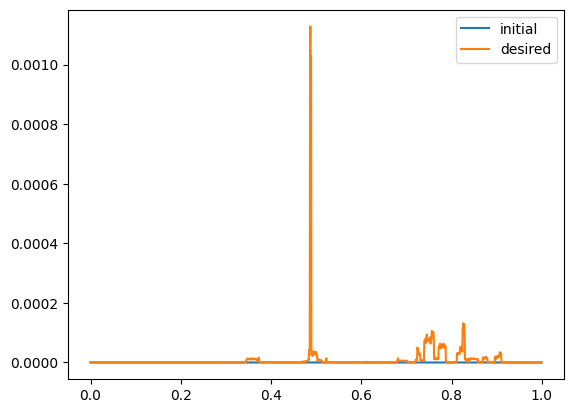

158
0.9105454545454545


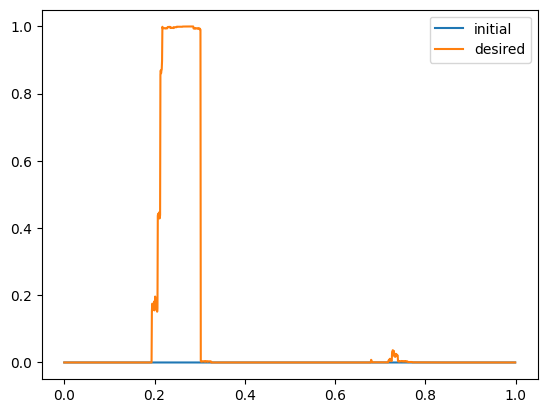

159
0.8909090909090909


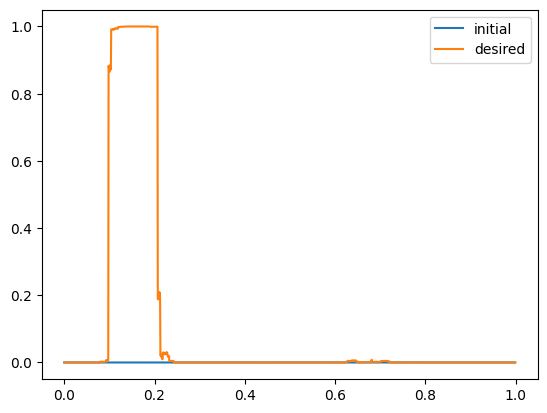

160
1.0


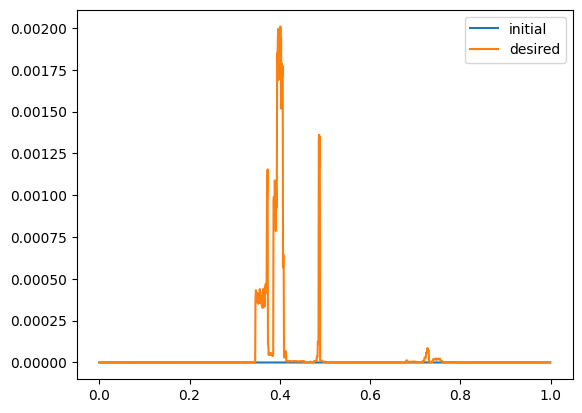

161
1.0


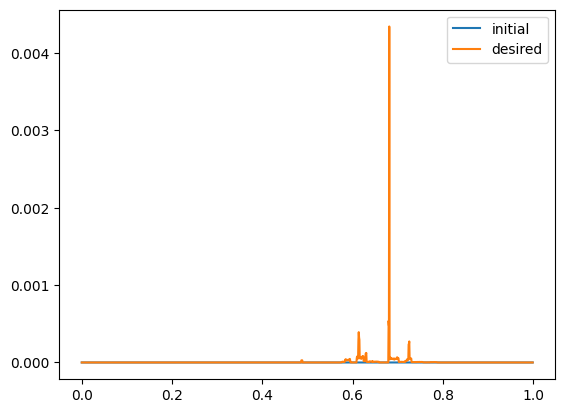

162
1.0


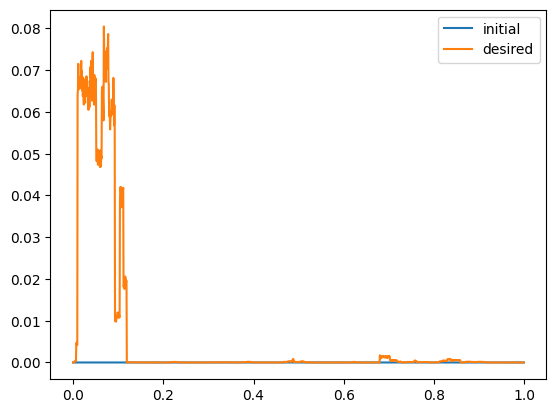

163
0.8909090909090909


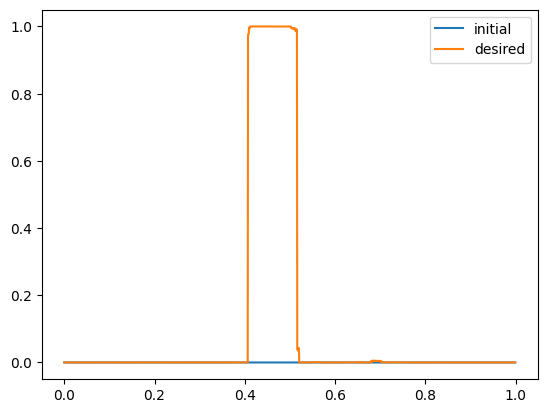

164
0.8909090909090909


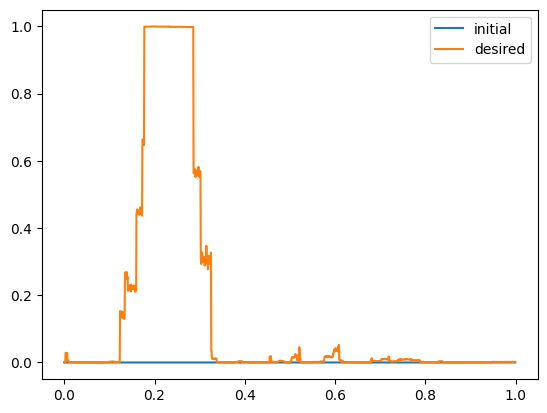

165
1.0


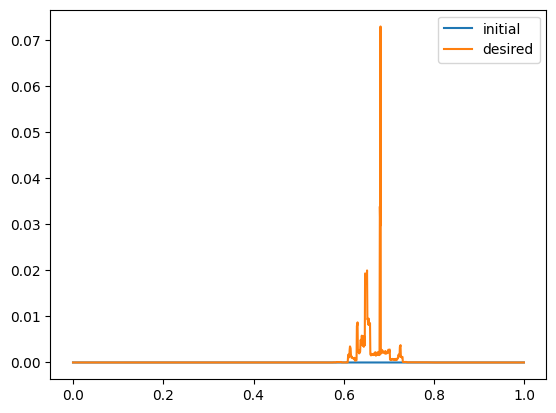

166
0.904


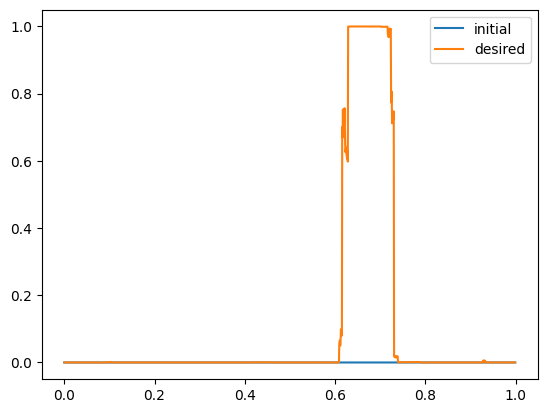

167
0.8916363636363637


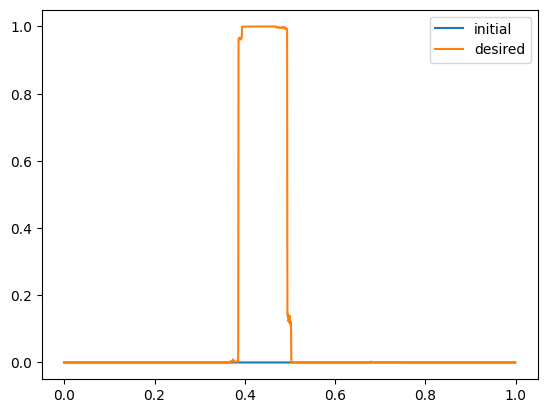

168
1.0


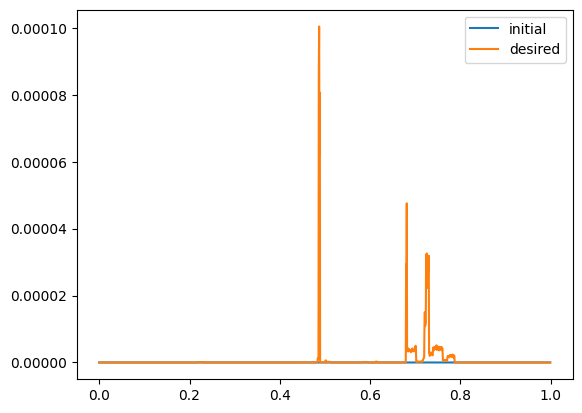

169
1.0


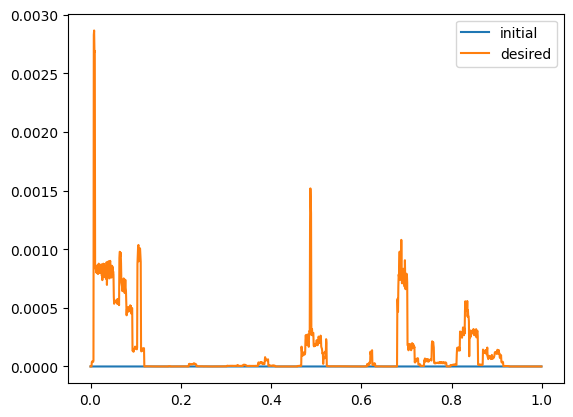

170
0.8916363636363637


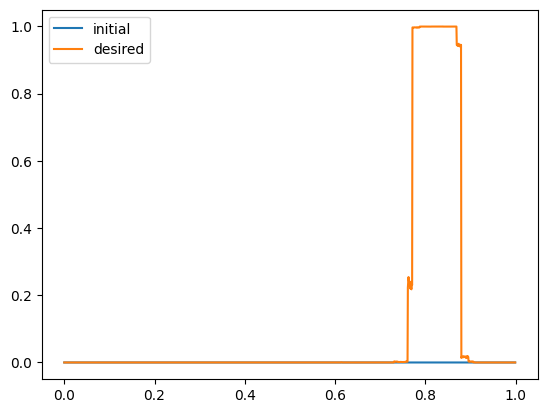

171
0.8865454545454545


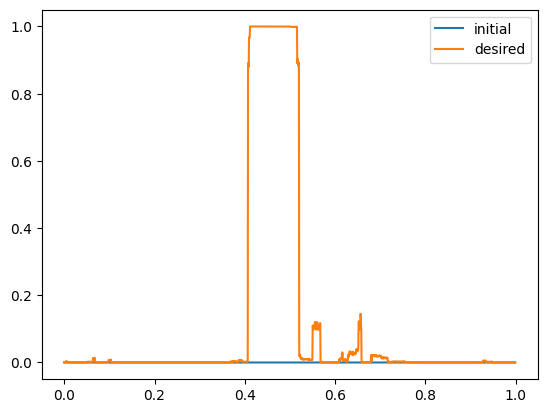

172
0.8916363636363637


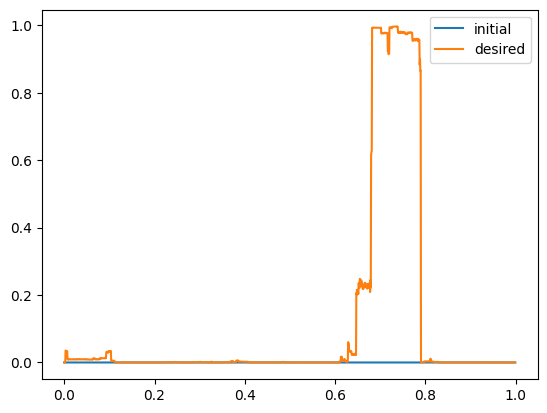

173
0.8574545454545455


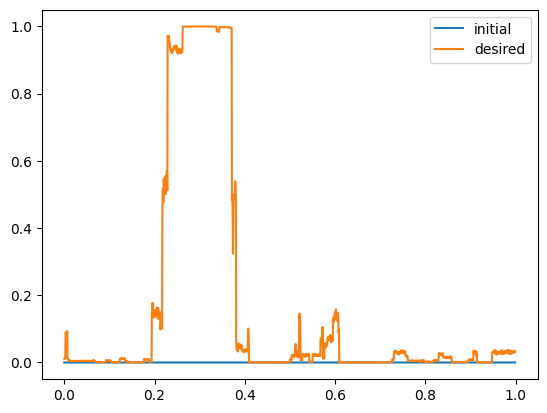

174
0.8916363636363637


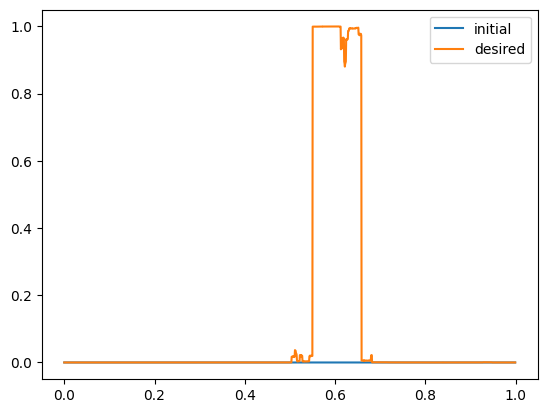

175
0.8909090909090909


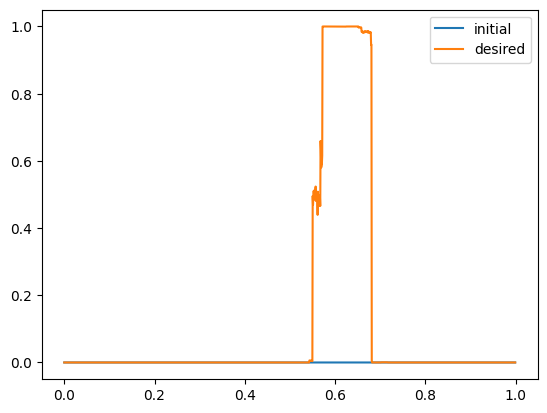

176
0.8901818181818182


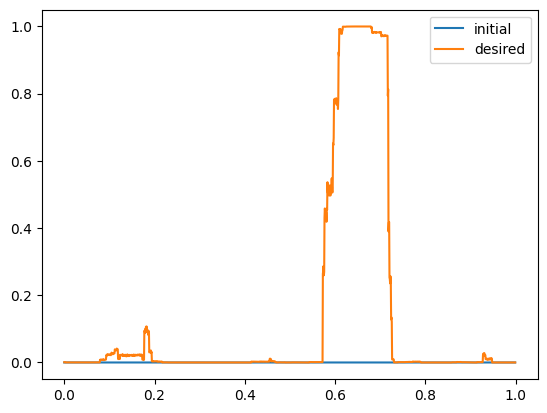

177
1.0


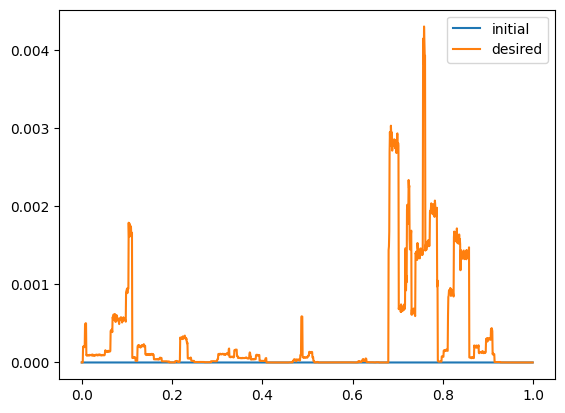

178
1.0


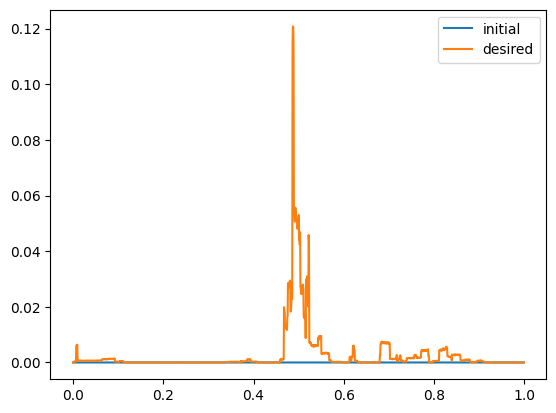

179
1.0


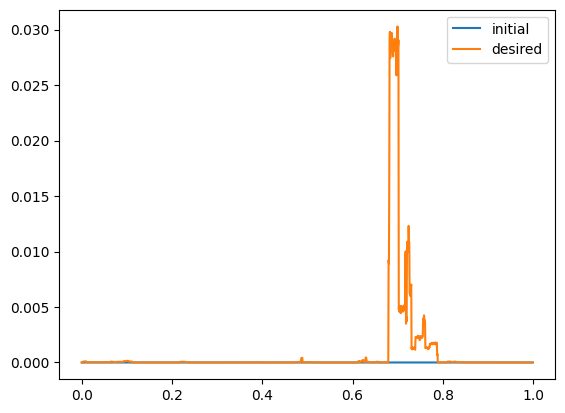

180
0.8690909090909091


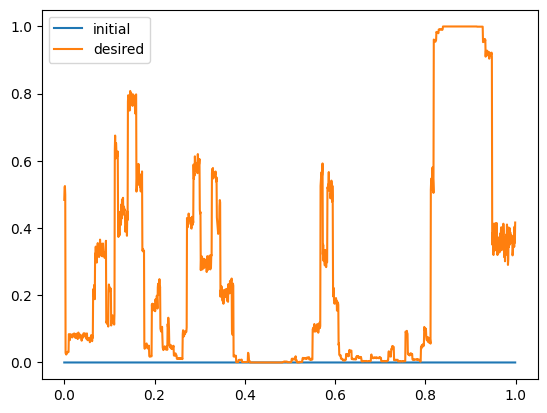

181
0.864


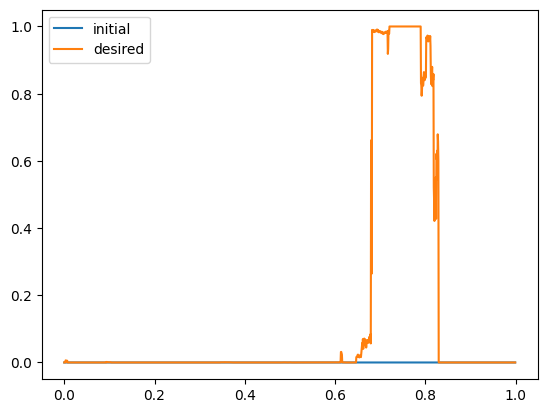

182
0.8916363636363637


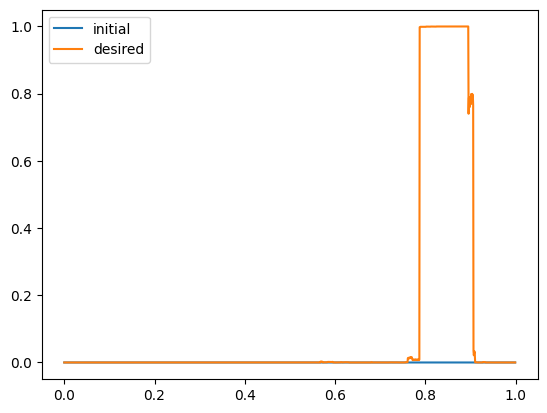

183
0.9643636363636363


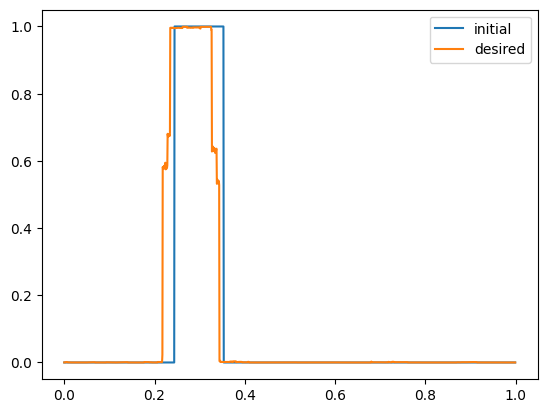

184
0.8909090909090909


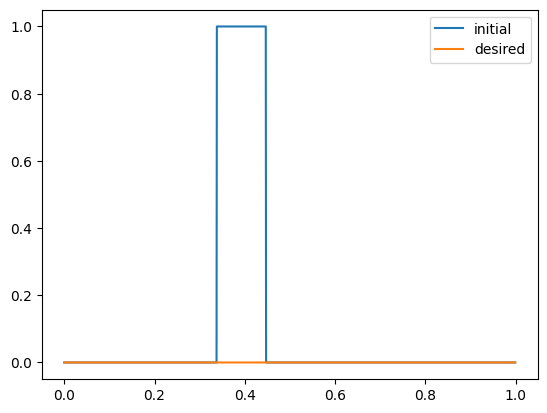

185
0.9832727272727273


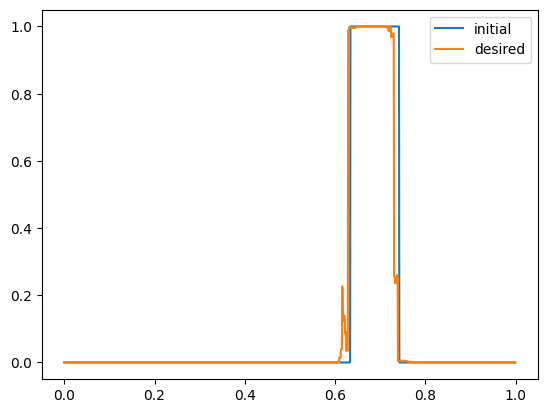

186
0.9309090909090909


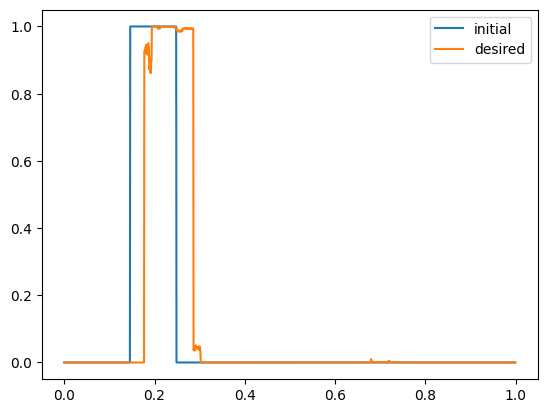

187
0.9207272727272727


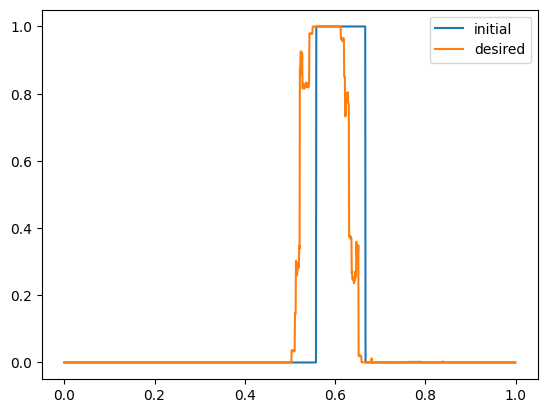

188
0.9672727272727273


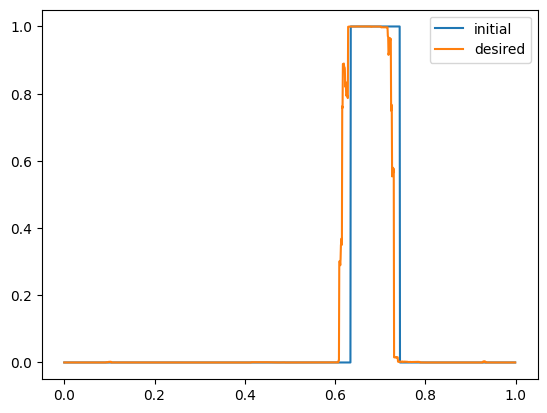

189
0.9410909090909091


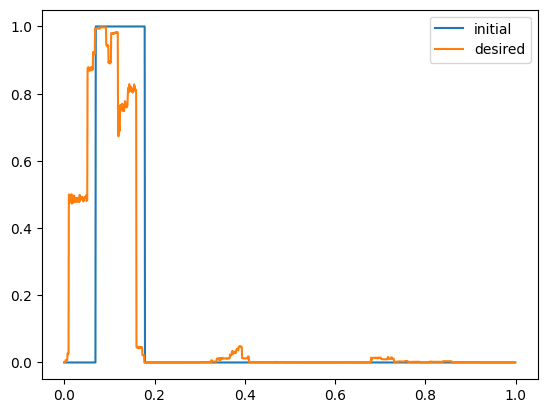

190
0.9192727272727272


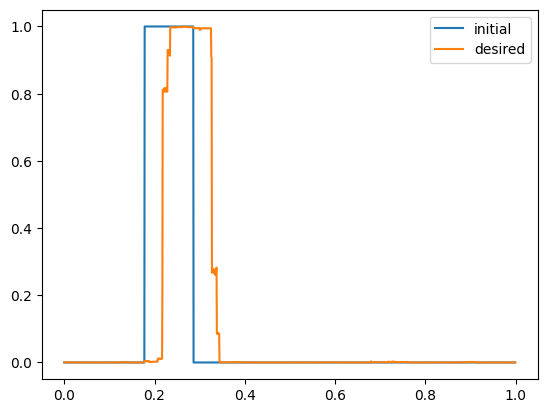

191
0.8916363636363637


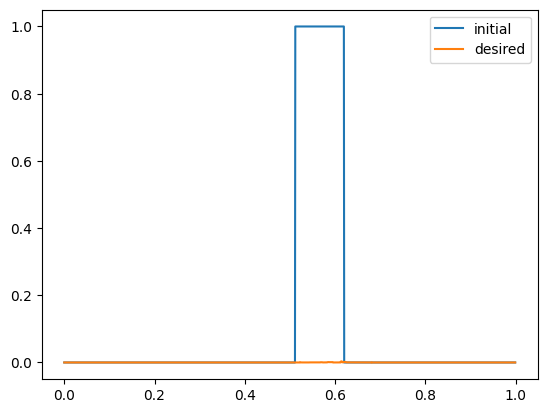

192
0.9272727272727272


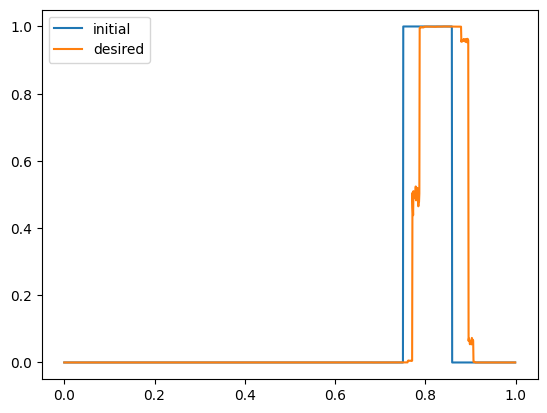

193
0.9745454545454545


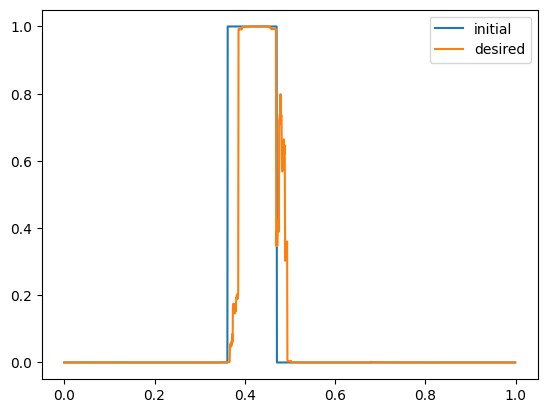

194
0.8909090909090909


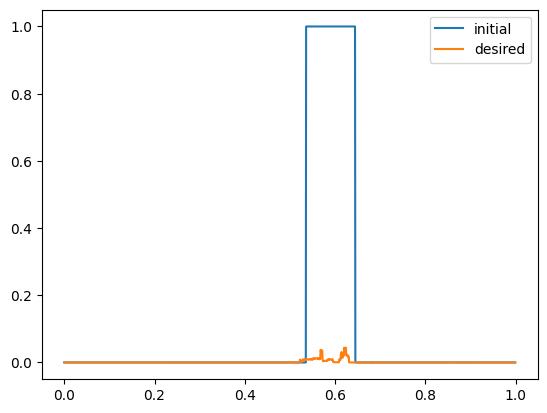

195
0.978909090909091


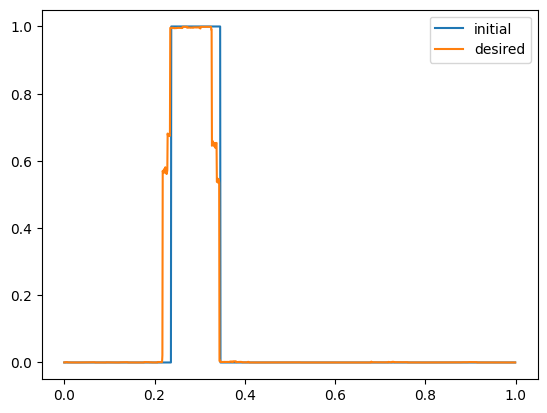

196
0.8909090909090909


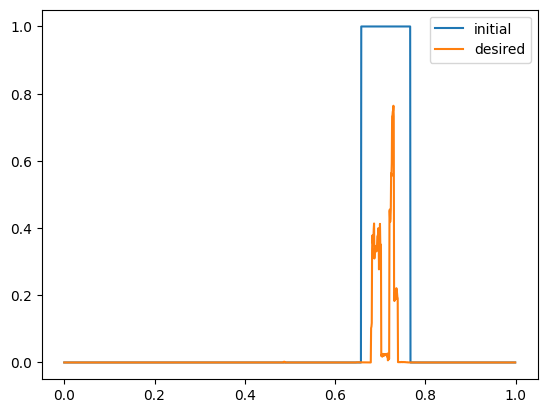

197
0.8909090909090909


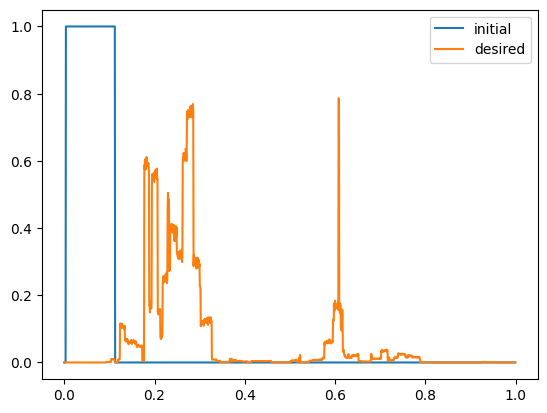

198
0.8909090909090909


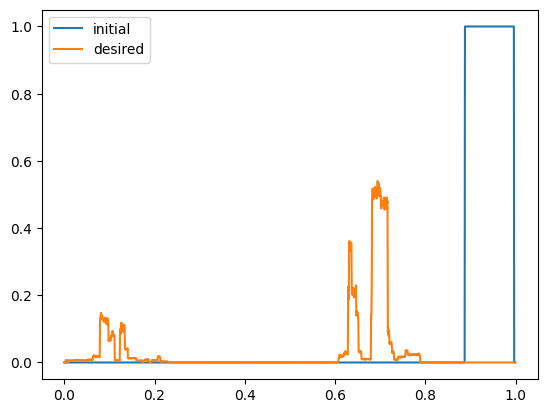

199
0.9592727272727273


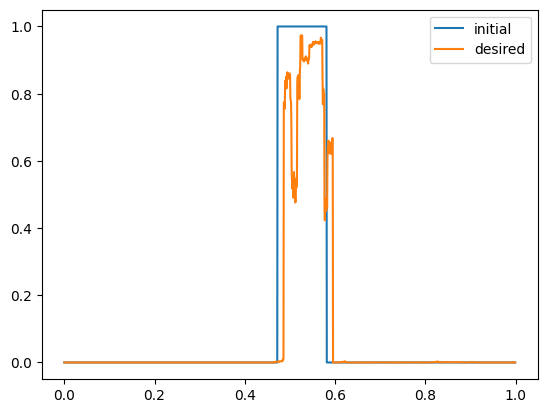

200
0.9527272727272728


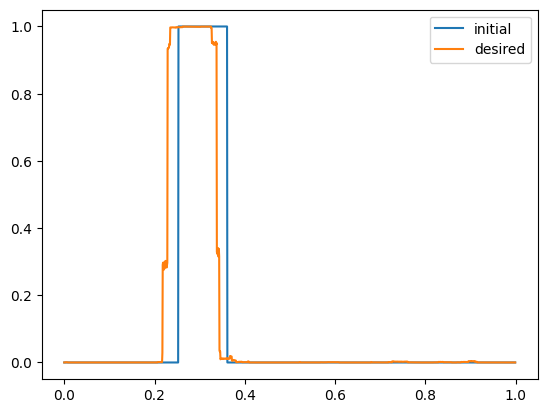

201
0.8909090909090909


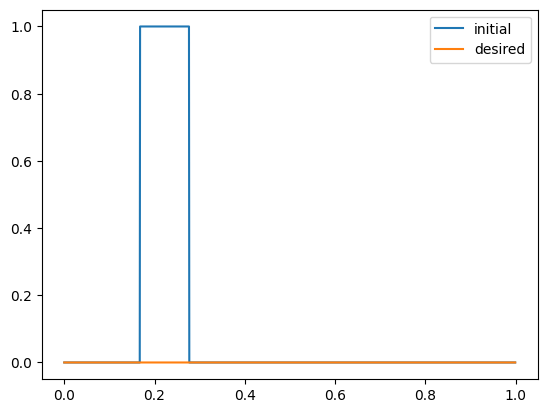

202
0.9185454545454546


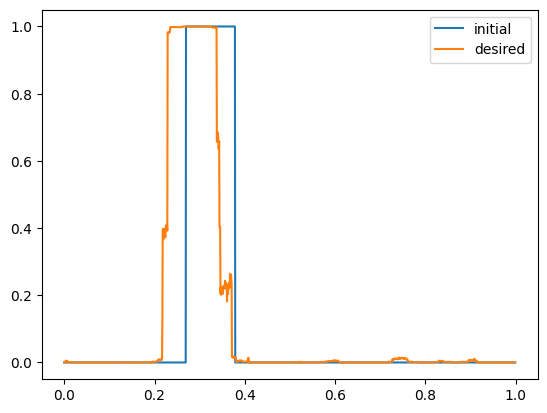

203
0.9323636363636364


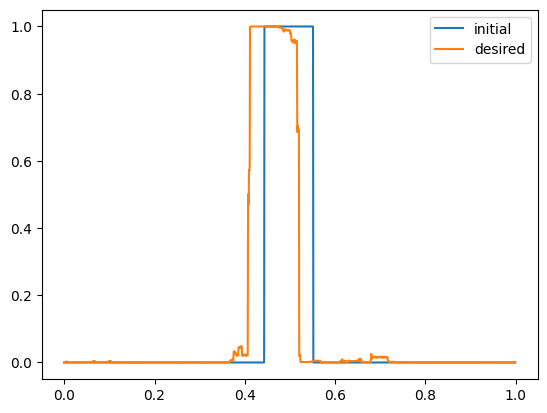

204
0.9796363636363636


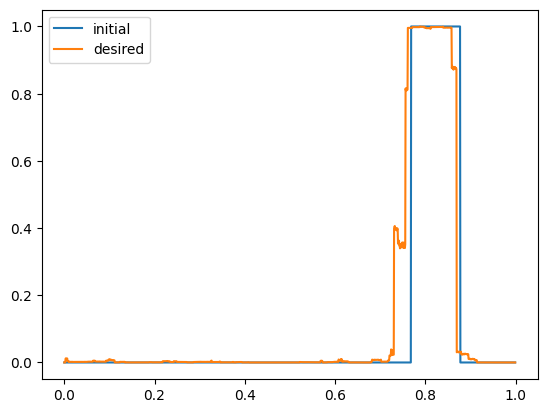

205
0.8909090909090909


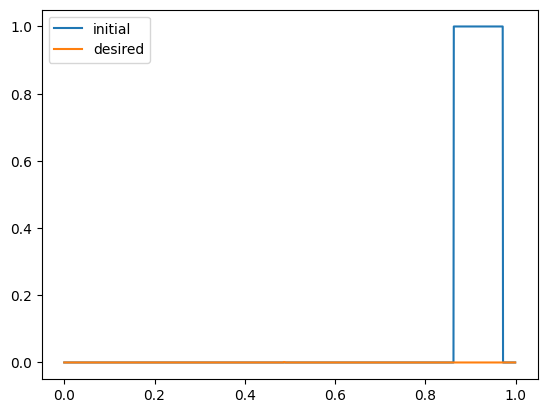

206
0.9549090909090909


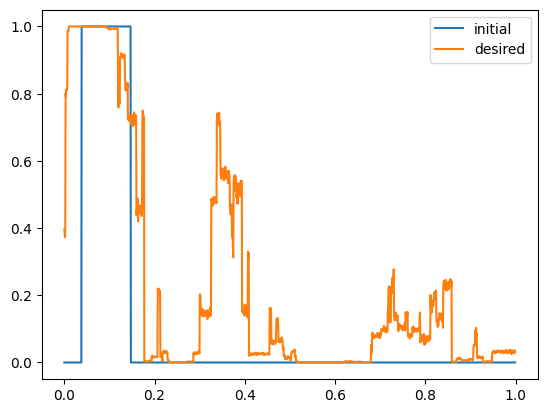

207
0.9694545454545455


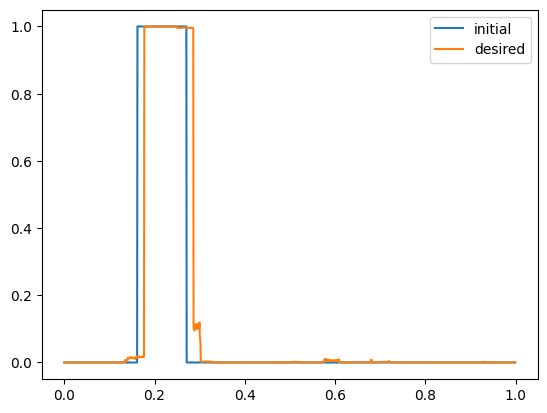

208
0.8909090909090909


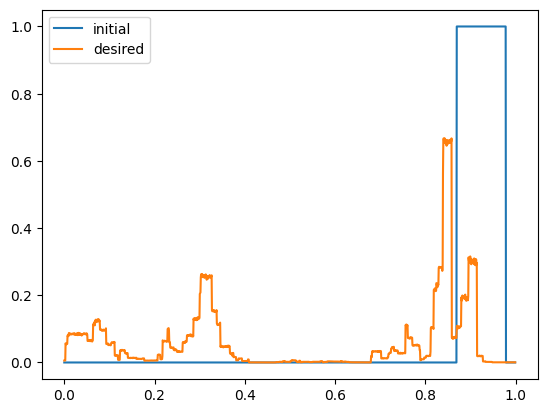

209
0.9650909090909091


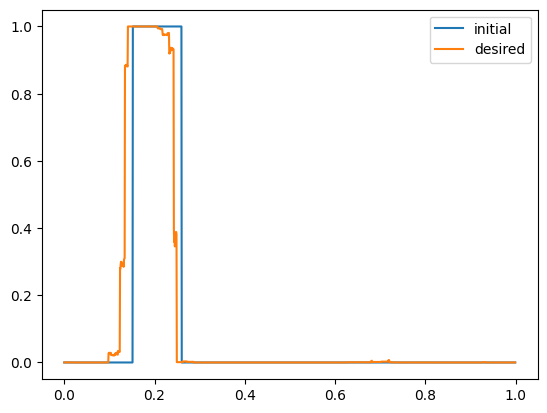

210
0.8909090909090909


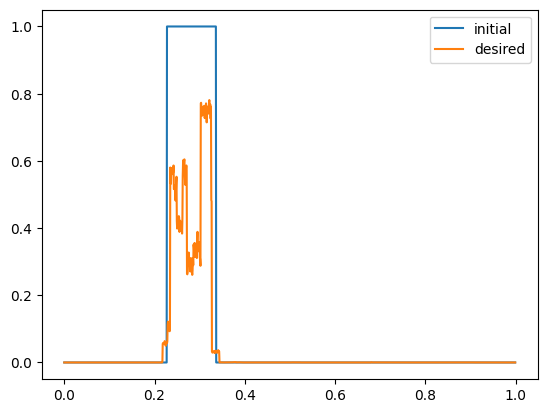

211
0.976


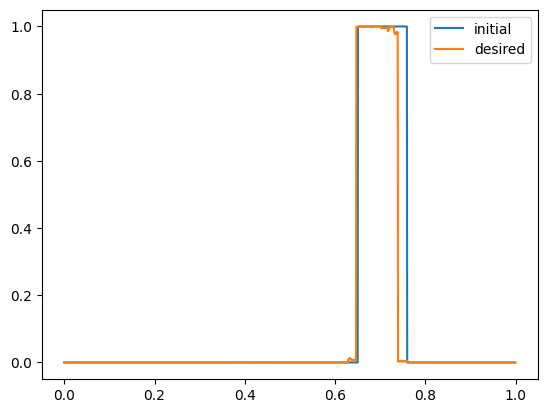

212
0.9541818181818181


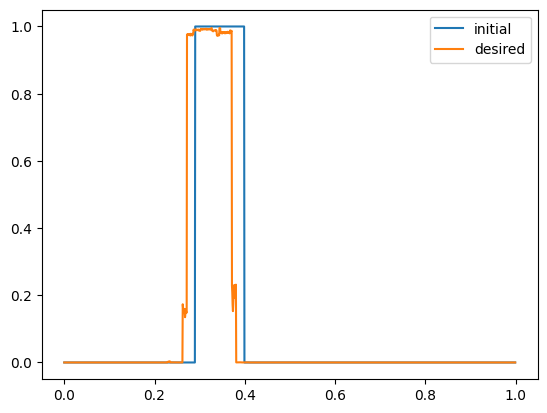

213
0.8916363636363637


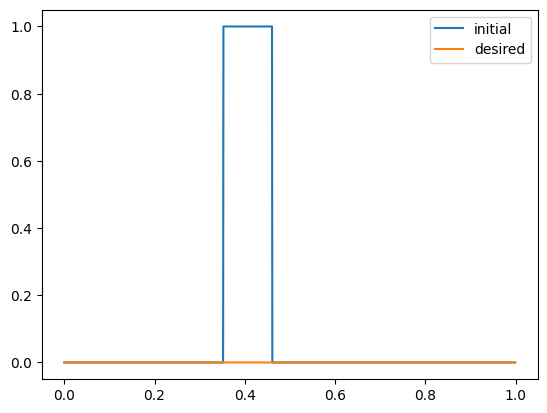

214
0.9767272727272728


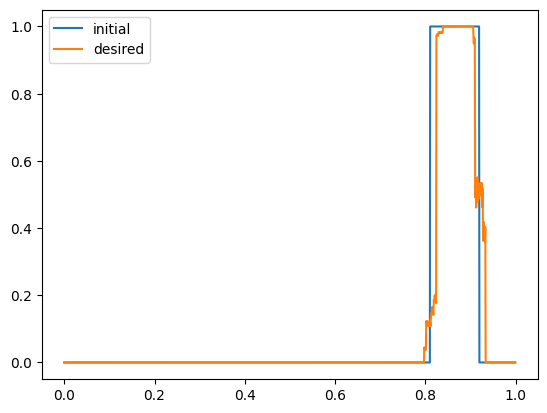

215
0.9454545454545454


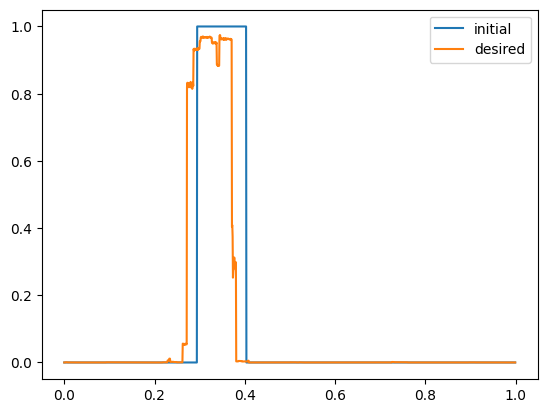

In [16]:
# test on test data
testloader = test_data
for i, data in enumerate(testloader,150):
    # get the inputs; data is a list of [inputs, labels]
    print(i)
    inputs, labels_og = data

    labels =  resize_label(labels_og, args.label_time)
    
    out = model(inputs)
    
    print(get_accuracy(labels, out,cutoff=0.8))
    
    #plot 
    plot_new_vs_old_label(labels,out.detach().numpy())

In [1]:
%run train_func.py

C:\Users\AT030915\AIG\venv\AIG_venv\lib\site-packages\torchaudio\functional\functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (151) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


input shape: (1,151,801)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 1, 197]           2,266
               GRU-2  [[-1, 1, 1375], [-1, 2, 1375]]               0
            Linear-3              [-1, 1, 1375]       1,892,000
           Sigmoid-4                 [-1, 1375]               0
Total params: 1,894,266
Trainable params: 1,894,266
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.46
Forward/backward pass size (MB): 28.83
Params size (MB): 7.23
Estimated Total Size (MB): 36.51
----------------------------------------------------------------


C:\Users\AT030915\AIG\venv\AIG_venv\lib\site-packages\torchaudio\functional\functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (151) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Epoch [1] loss: 0.6411600112915039, learning rate [0.0004], training accuracy cutoff (0.8): 0.94566, average label 0.05434
Epoch [2] loss: 0.46522998809814453, learning rate [0.00045], training accuracy cutoff (0.8): 0.62738, average label 0.01548
Epoch [3] loss: 0.3684599995613098, learning rate [0.00049], training accuracy cutoff (0.8): 0.62738, average label 0.01548
Epoch [4] loss: 0.8957099914550781, learning rate [0.00054], training accuracy cutoff (0.8): 0.62738, average label 0.01548
Epoch [5] loss: 1.0818899869918823, learning rate [0.00058], training accuracy cutoff (0.8): 0.62738, average label 0.01548
Epoch [6] loss: 0.42333000898361206, learning rate [0.00063], training accuracy cutoff (0.8): 0.5, average label 0.0
Epoch [7] loss: 0.39239001274108887, learning rate [0.00067], training accuracy cutoff (0.8): 0.5, average label 0.0
Epoch [8] loss: 0.3343600034713745, learning rate [0.00072], training accuracy cutoff (0.8): 0.5, average label 0.0
Epoch [9] loss: 0.437739998102

NameError: name 'outname' is not defined

1.0


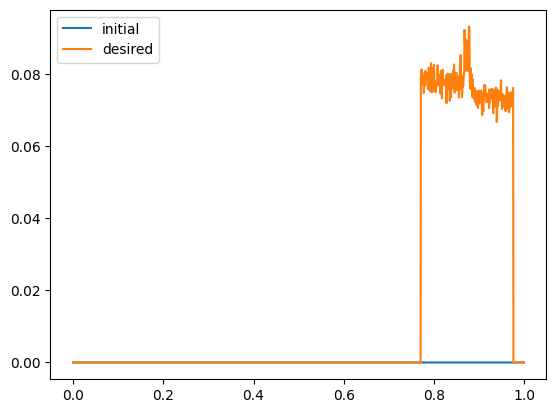

1.0


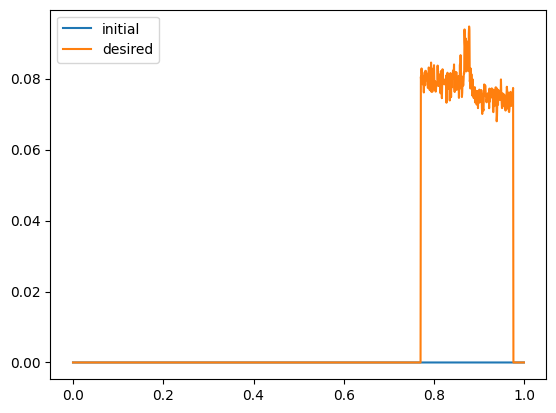

1.0


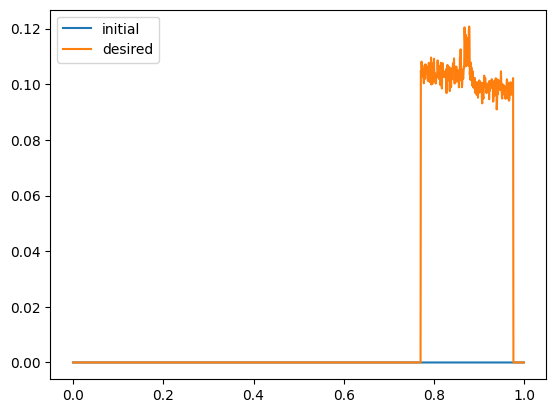

0.8909090909090909


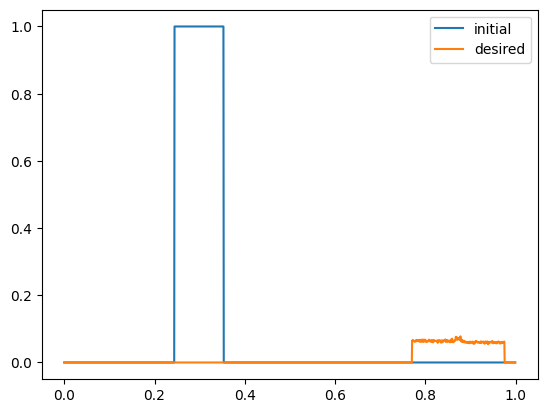

0.8909090909090909


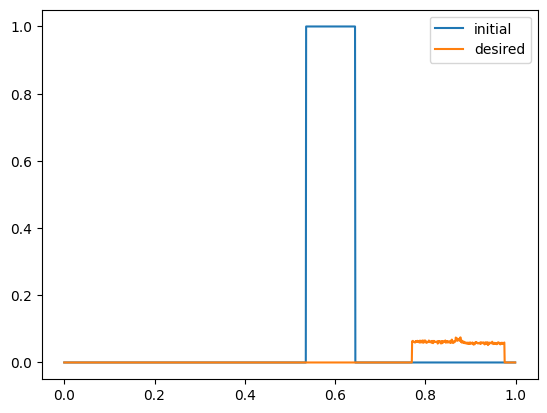

0.8909090909090909


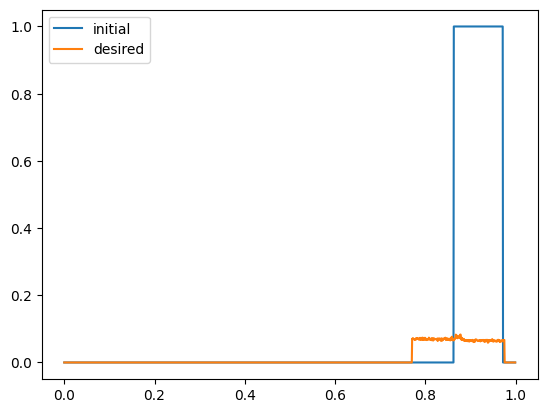

In [7]:
# test on test data
testloader = test_data
for i, data in enumerate(testloader, 2):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels_og = data

    labels =  resize_label(labels_og, args.label_time)
    
    out = model(inputs)
    
    print(get_accuracy(labels, out,cutoff=0.8))
    
    #plot 
    plot_new_vs_old_label(labels,out.detach().numpy())
    

In [17]:
acc = np.round(running_accuracy.detach().numpy()/N_trainloader,5)

print(f'{acc}')

#fix this 
# add ability to change file paths

0.94545


In [20]:
f_prec(outputs,labels).detach().numpy()

array(0., dtype=float32)

In [2]:
running_loss = 0.0
running_accuracy = 0.0
running_prec = 0.0
running_rec = 0.0
running_av_label = 0.0 

model.eval()

N_trainloader = len(test_data)


for i, data in enumerate(test_data):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels_og = data

    labels =  resize_label(labels_og, args.label_time)

    outputs = model(inputs)


    running_accuracy += f_acc(outputs,labels)
    #get_accuracy(labels, outputs,cutoff=args.cutoff)
    running_prec += f_prec(outputs,labels)
    running_rec  += f_rec(outputs,labels)
    running_av_label += torch.mean(labels)

acc = torch.round(running_accuracy/N_trainloader,4)
prec = np.round(running_prec/N_trainloader,4)
rec = np.round(running_rec/N_trainloader   ,4)
mean_label = running_av_label/N_trainloader
print(f'              Test for Epoch [{epoch + 1}], accuracy,precision,recall ({acc},{prec},{rec}), average label {mean_label}')

TypeError: round() received an invalid combination of arguments - got (Tensor, int), but expected one of:
 * (Tensor input, *, Tensor out)
 * (Tensor input, *, int decimals, Tensor out)


In [1]:
%run train_func.py

C:\Users\AT030915\AIG\venv\AIG_venv\lib\site-packages\torchaudio\functional\functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (151) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


input shape: (1,151,801)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 1, 197]           2,266
               GRU-2  [[-1, 1, 1375], [-1, 2, 1375]]               0
            Linear-3              [-1, 1, 1375]       1,892,000
           Sigmoid-4                 [-1, 1375]               0
Total params: 1,894,266
Trainable params: 1,894,266
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.46
Forward/backward pass size (MB): 28.83
Params size (MB): 7.23
Estimated Total Size (MB): 36.51
----------------------------------------------------------------


C:\Users\AT030915\AIG\venv\AIG_venv\lib\site-packages\torchaudio\functional\functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (151) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Epoch [1] loss: 0.6411594748497009, learning rate [0.0004], training accuracy cutoff (0.8): 0.9456623792648315, average label 0.05433766171336174
Epoch [2] loss: 0.4759998321533203, learning rate [0.00042291169451073987], training accuracy cutoff (0.8): 0.6273766160011292, average label 0.015480519272387028
Epoch [3] loss: 0.34705406427383423, learning rate [0.0004458233890214797], training accuracy cutoff (0.8): 0.6273766160011292, average label 0.015480519272387028
Epoch [4] loss: 0.7767381072044373, learning rate [0.0004687350835322196], training accuracy cutoff (0.8): 0.6273766160011292, average label 0.015480519272387028


KeyboardInterrupt: 

In [1]:
#to launch the experiments server 

#!mlflow server   


# Load Model + Create weights logger 

In [2]:
import torch
from model import * #need to load in class

model_filepath = 'Saved_models/model_test_mel_100_epochs'
model = torch.load(model_filepath)

model

TriggerWord_LSTM(
  (Conv): Conv1d(151, 1, kernel_size=(15,), stride=(4,))
  (GRU): GRU(197, 1375, num_layers=2, batch_first=True, dropout=0.8)
  (Dense): Linear(in_features=1375, out_features=1375, bias=True)
  (Sigmoid): Sigmoid()
)

In [3]:
def log_weights(model,step):
    '''
    GRU - need to use all weight which returns a (2,4) list of weights
    - biases need to type in bias_hh_l0 (there a 10,01,00,11 - not worth adding to this
    '''
    
    writer.add_summary(histogram('weights/Conv/weight', model.Conv.weight.data).eval(), step)
    writer.add_summary(histogram('weights/Conv/bias'  , model.Conv.bias.data).eval(), step)

    # NO GRU W  + B added 

    writer.add_summary(histogram('weights/Dense/weight', model.Dense.weight.data).eval(), step)
    writer.add_summary(histogram('weights/Dense/weight', model.Dense.weight.data).eval(), step)    


# Modules + hyperparameters set 

In [4]:
import torch
#hyper parameters 
import torch.optim as optim
from model import get_accuracy
from model import *
from data_loading import resize_label
from data_loading import *
from torch.utils.data import DataLoader
from torchsummary import summary
import numpy as np


# Create Params dictionary

class Params(object):

    def __init__(self, batch_size, test_batch_size, number_frequencies, number_time_steps, epochs, lr, seed, cuda, log_interval,early_stopper_patience,early_stopper_min_delta, label_time,cutoff):
        '''
        Names self explanatory - seed = Random seed number, log_interval - the intervals at which the weights and biases will be recorded 
        '''

        self.batch_size = batch_size

        self.test_batch_size = test_batch_size

        self.epochs = epochs

        self.lr = lr
        
        self.number_frequencies = number_frequencies
        
        self.number_time_steps = number_time_steps
        

        self.seed = seed

        self.cuda = cuda

        self.log_interval = log_interval

        self.early_stopper_patience = early_stopper_patience
        
        self.early_stopper_min_delta = early_stopper_min_delta
        
        self.label_time = label_time
        
        self.cutoff = cutoff

In [5]:
# modules needed from: https://learn.microsoft.com/en-us/azure/databricks/_extras/notebooks/source/mlflow/mlflow-pytorch-training.html
from __future__ import print_function

import os

import tempfile

import torch

import torch.nn as nn

import torch.nn.functional as F

import torch.optim as optim

from torch.autograd import Variable

from tensorboardX import SummaryWriter

from collections import namedtuple

import tensorflow as tf

import tensorflow.summary

from tensorflow.summary import scalar

from tensorflow.summary import histogram

#from chardet.universaldetector import UniversalDetector

In [22]:
args =Params(batch_size = 4, test_batch_size = 4,
             number_frequencies = 151,
             number_time_steps = 400,
             epochs = 100, lr =0.01, 
             seed = 1, cuda = False, 
             log_interval = 200,
             early_stopper_patience = 3,
             early_stopper_min_delta=0.01,
             label_time = 1375,
            cutoff =0.8) #enter zero then label_time (shape of output of output of nerual network will be equal to the size of the input spectrogram)),

cuda = not args.cuda and torch.cuda.is_available()
device = get_default_device() #not sure if I'm going to use this 
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}

#  Load data

In [23]:
#### Load data 

test_waveform = ReadData_Mel('test',spectrogram_str=False)
test_data = ReadData_Mel('test',spectrogram_str=True, normalize = True, mask_str = False, number_frequencies = args.number_frequencies,number_time_steps = args.number_time_steps, t_l = 100, f_l = 2)
#ReadData('test',spectrogram_str='True',number_frequencies = spec_freq,number_time_steps = spec_time)
train_data = ReadData_Mel('train',spectrogram_str=True, normalize = True, mask_str = False, number_frequencies = args.number_frequencies,number_time_steps = args.number_time_steps, t_l = 100, f_l = 2)
#ReadData('train',spectrogram_str='True',number_frequencies = spec_freq,number_time_steps = spec_time)

train_loader = DataLoader(train_data, args.batch_size, shuffle=False)
test_loader = DataLoader(test_data, args.batch_size, shuffle=False)






In [24]:
#### Initialise model

# import the model and initialise 
#load in to know the size of the spectrogram - the fft does quite give you a spec_time length for the time dimension
spec_wave = test_data[-1][0]
spec_label = test_data[-1][1]



input_freq =spec_wave.shape[1]
input_time = spec_wave.shape[2]

output_time = args.label_time
if output_time ==0:
    output_time = input_time


hidden_time = output_time #could change this down the line 


model =TriggerWord_LSTM(input_freq, input_time , hidden_time, output_time, Conv_p(),GRU_p())
 
#torch.load('model_test_28_04_23_100_epochs')
#TriggerWord_LSTM(input_freq, input_time , hidden_time, output_time, Conv_p(),GRU_p())
#SimpleRNN(time = input_time,dropout_rate=0.5)

#model.Conv
print(f"input shape: (1,{input_freq},{input_time})")  
summary(model, (input_freq,input_time))     

input shape: (1,151,801)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 1, 197]           2,266
               GRU-2  [[-1, 1, 1375], [-1, 2, 1375]]               0
            Linear-3              [-1, 1, 1375]       1,892,000
           Sigmoid-4                 [-1, 1375]               0
Total params: 1,894,266
Trainable params: 1,894,266
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.46
Forward/backward pass size (MB): 28.83
Params size (MB): 7.23
Estimated Total Size (MB): 36.51
----------------------------------------------------------------


In [25]:
#create early stopper class
#I'll be using training instead of validation loss 
#https://stackoverflow.com/questions/71998978/early-stopping-in-pytorch
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False


In [26]:
#### Choose optimizers,scheduler, loss, and early stopping condtion
criterion = torch.nn.BCELoss()

#alternate optmizer + scheduler - from guidance from https://www.assemblyai.com/blog/end-to-end-speech-recognition-pytorch/
optimizer = optim.AdamW(model.parameters(), args.lr)

scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
	max_lr=args.lr,
	steps_per_epoch=int(len(train_data)),
	epochs=args.epochs,
	anneal_strategy='linear')

early_stopper = EarlyStopper(patience=args.early_stopper_patience, min_delta=args.early_stopper_min_delta)


# Create main training functions

In [27]:
if cuda:
    model.cuda()

writer = None # Will be used to write TensorBoard events

def log_scalar(name, value, step):

    """Log a scalar value to both MLflow and TensorBoard"""

    #writer.add_summary(scalar(name, value).eval(), step)

    mlflow.log_metric(name, value, step=step)

In [50]:

def train(epoch,N_trainloader):
    running_loss = 0.0
    running_accuracy = 0.0
    running_prec = 0.0
    running_rec = 0.0
    running_av_label = 0.0 
    model.train()
    for i, data in enumerate(train_data):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels_og = data
        
        labels =  resize_label(labels_og, args.label_time)
        

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        if early_stopper.early_stop(loss):             
            break
        
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        running_accuracy += f_acc(outputs,labels)
        #get_accuracy(labels, outputs,cutoff=args.cutoff)
        running_prec += f_prec(outputs,labels)
        running_rec  += f_rec(outputs,labels)
        running_av_label += torch.mean(labels)
        # if i % 4 == 3:    # print every 2000 mini-batches
        #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.7f}')
        #     running_loss = 0.0
    
    lr_end = scheduler.get_last_lr()
    acc = running_accuracy/N_trainloader
    prec = running_prec/N_trainloader
    rec = running_rec/N_trainloader
    
    mean_label = running_av_label/N_trainloader
    
    print(f'Epoch [{epoch + 1}] loss: {loss}, learning rate {lr_end}, training accuracy cutoff ({args.cutoff}): {acc}, average label {mean_label}')
        
    log_scalar('loss',loss,step=epoch)
    log_scalar('lr',lr_end[0],step=epoch)
    log_scalar('accuracy_with_cutoff',acc,step=epoch)
    log_scalar('precision_with_cutoff',prec,step=epoch)
    log_scalar('recall_with_cutoff',rec,step=epoch)    

    log_scalar('mean_label',mean_label,step=epoch)
    
    scheduler.step()



In [51]:
def test(epoch,test_data):
    running_loss = 0.0
    running_accuracy = 0.0
    running_prec = 0.0
    running_rec = 0.0
    running_av_label = 0.0 
    
    model.eval()
    
    N_trainloader = len(test_data)


    for i, data in enumerate(test_data):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels_og = data

        labels =  resize_label(labels_og, args.label_time)

        outputs = model(inputs)


        running_accuracy += f_acc(outputs,labels)
        #get_accuracy(labels, outputs,cutoff=args.cutoff)
        running_prec += f_prec(outputs,labels)
        running_rec  += f_rec(outputs,labels)
        running_av_label += torch.mean(labels)

    acc = running_accuracy/N_trainloader
    prec = running_prec/N_trainloader
    rec = running_rec/N_trainloader    
    mean_label = running_av_label/N_trainloader
    print(f'Test for Epoch [{epoch + 1}], accuracy  = {acc}, precision =  {prec}, recall =  {rec}, average label {mean_label}')

    


In [52]:
def main():
    N_trainloader = len(train_data)

    for epoch in range(args.epochs):  # loop over the dataset multiple times
        
        train(epoch,N_trainloader)
        test(epoch,test_data)

    

    
    scheduler.step()    
    

In [53]:
import mlflow.pytorch
from torchmetrics.classification import BinaryF1Score, BinaryPrecision, BinaryRecall, BinaryAccuracy

#F1 = BinaryF1Score(threshold=args.cutoff)
f_prec = BinaryPrecision(threshold=args.cutoff)
f_rec = BinaryRecall(threshold=args.cutoff)
f_acc = BinaryAccuracy(threshold=args.cutoff)


#choose experiment name
experiment_name = 'test1'
mlflow.set_experiment(experiment_name)
experiment = mlflow.get_experiment_by_name(experiment_name)

with mlflow.start_run() as run:  
    # Log our parameters into mlflow
    for key, value in vars(args).items():
        mlflow.log_param(key, value)
    
    main()
    


Epoch [1] loss: 0.03345305100083351, learning rate [0.0050281622911694515], training accuracy cutoff (0.8): 0.0, average label 0.0
Test for Epoch [1], accuracy  = 0.9454545974731445, precision =  0.0, recall =  0.0, average label 0.05454545095562935
Epoch [2] loss: 0.027715833857655525, learning rate [0.005051073985680192], training accuracy cutoff (0.8): 0.0, average label 0.0
Test for Epoch [2], accuracy  = 0.9454545974731445, precision =  0.0, recall =  0.0, average label 0.05454545095562935
Epoch [3] loss: 0.02552669122815132, learning rate [0.005073985680190932], training accuracy cutoff (0.8): 0.0, average label 0.0
Test for Epoch [3], accuracy  = 0.9454545974731445, precision =  0.0, recall =  0.0, average label 0.05454545095562935
Epoch [4] loss: 0.02394193410873413, learning rate [0.005096897374701671], training accuracy cutoff (0.8): 0.0, average label 0.0
Test for Epoch [4], accuracy  = 0.9454545974731445, precision =  0.0, recall =  0.0, average label 0.05454545095562935
Ep

KeyboardInterrupt: 

In [49]:
def test(epoch,test_data):
    running_loss = 0.0
    running_accuracy = 0.0
    running_prec = 0.0
    running_rec = 0.0
    running_av_label = 0.0 
    
    model.eval()
    
    N_trainloader = len(test_data)


    for i, data in enumerate(test_data):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels_og = data

        labels =  resize_label(labels_og, args.label_time)

        outputs = model(inputs)


        running_accuracy += f_acc(outputs,labels)
        #get_accuracy(labels, outputs,cutoff=args.cutoff)
        running_prec += f_prec(outputs,labels)
        running_rec  += f_rec(outputs,labels)
        running_av_label += torch.mean(labels)

    acc = running_accuracy/N_trainloader
    prec = running_prec/N_trainloader
    rec = running_rec/N_trainloader    
    mean_label = running_av_label/N_trainloader
    print(f'Test for Epoch [{epoch + 1}], accuracy  = {acc}, precision =  {prec}, recall =  {rec}, average label {mean_label}')

    


NameError: name 'epoch' is not defined

1.0
tensor(1.)


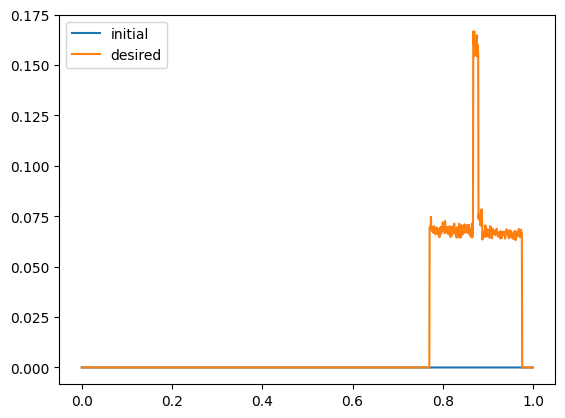

1.0
tensor(1.)


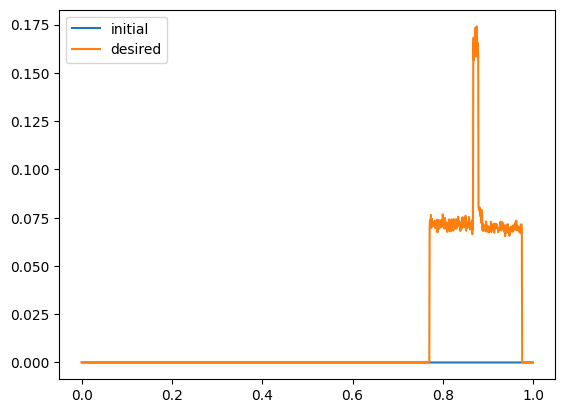

1.0
tensor(1.)


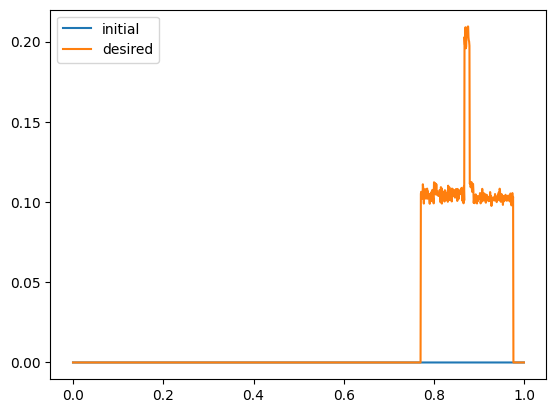

0.8909090909090909
tensor(0.8909)


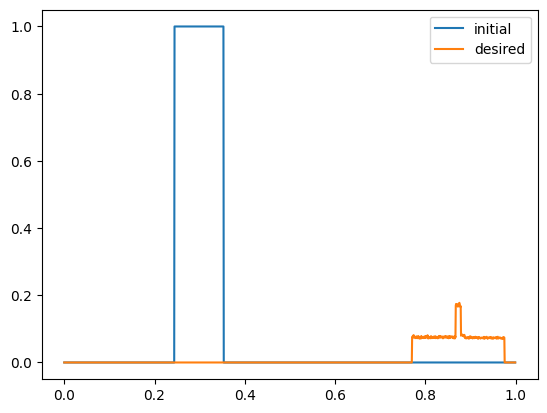

0.8909090909090909
tensor(0.8909)


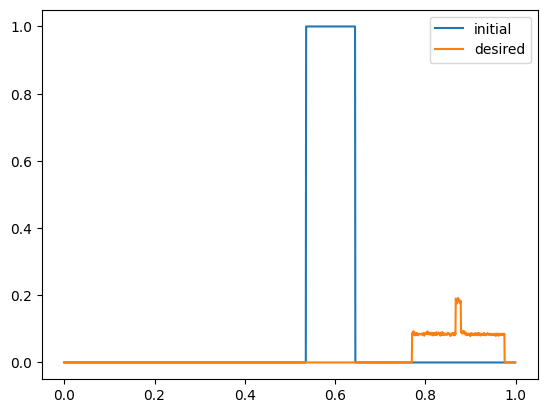

0.8909090909090909
tensor(0.8909)


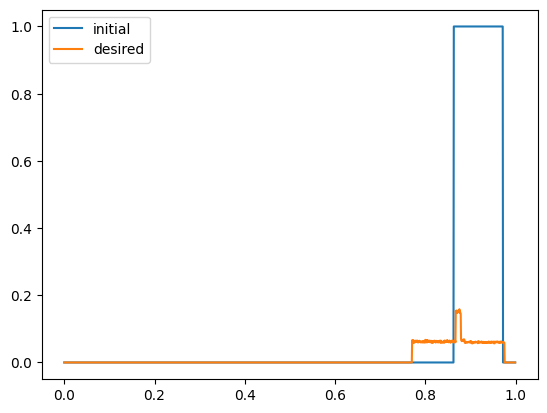

In [40]:
# test on test data

model.eval()
    running_loss = 0.0
    running_accuracy = 0.0
    running_prec = 0.0
    running_rec = 0.0
    running_av_label = 0.0 

for i, data in enumerate(train_data):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels_og = data

    labels =  resize_label(labels_og, args.label_time)
    
    out = model(inputs)
    
    print(get_accuracy(labels, out,cutoff=args.cutoff))
    print(f_acc(out,labels))
    
    #plot 
    plot_new_vs_old_label(labels,out.detach().numpy())

In [162]:
%run train

input shape: (1,151,801)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 1, 197]           2,266
               GRU-2  [[-1, 1, 1375], [-1, 2, 1375]]               0
            Linear-3              [-1, 1, 1375]       1,892,000
           Sigmoid-4                 [-1, 1375]               0
Total params: 1,894,266
Trainable params: 1,894,266
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.46
Forward/backward pass size (MB): 28.83
Params size (MB): 7.23
Estimated Total Size (MB): 36.51
----------------------------------------------------------------
Epoch [1] loss: 0.6483827233314514, learning rate [0.0004], training accuracy cutoff (0.1): 0.054337662337662344, average label 0.05433766171336174
Epoch [2] loss: 0.44301438331604004, learning rate [0.00042291169451073987], training accuracy cutoff (0.1): 0.054

KeyboardInterrupt: 

In [43]:
def train(epoch):
    '''
    # The example doesn't pass model and criterion as variables - I assume this is to keep their scope global 
    '''
    N_trainloader = len(train_loader)
    model.train()
    
    running_loss = 0.0
    running_accuracy = 0.0
    running_av_label = 0.0 
    for batch_idx, (data, labels_og) in enumerate(train_loader):
        #resize the labels to match the size of the output of the NN
        labels =  resize_label(labels_og, output_time)
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        #add in early stopping 
        
        
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        running_accuracy += get_accuracy(labels, outputs,cutoff=cutoff)
        running_av_label += torch.mean(labels)
        if batch_idx % args.log_interval == 0:

            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(

                epoch, batch_idx * len(data), len(train_loader.dataset),

                100. * batch_idx / len(train_loader), loss.data.item()))

            step = epoch * len(train_loader) + batch_idx

            log_scalar('train_loss', loss.data.item(), step)

            model.log_weights(step)
    
    print(f'Epoch [{epoch + 1}] loss: {loss}, learning rate {scheduler.get_lr()}, training accuracy cutoff ({cutoff}): {running_accuracy/N_trainloader}, average label {running_av_label/N_trainloader}')

        
    

In [77]:
import mlflow

In [79]:
'''
# The example doesn't pass model and criterion as variables - I assume this is to keep their scope global 
'''
train = ReadData_Mel('train',spectrogram_str=True, normalize = True, mask_str = False, number_frequencies = args.number_frequencies,number_time_steps = args.number_time_steps, t_l = 100, f_l = 2)

N_trainloader = len(train)
model.train()
epoch = 0

running_loss = 0.0
running_accuracy = 0.0
running_av_label = 0.0 
for batch_idx, (data, labels_og) in enumerate(train):
    #resize the labels to match the size of the output of the NN
    labels =  resize_label(labels_og, output_time)


    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(data)
    loss = criterion(outputs, labels)
    loss.backward()

    #add in early stopping 


    optimizer.step()

    # print statistics
    running_loss += loss.item()
    running_accuracy += get_accuracy(labels, outputs,cutoff=args.cutoff)
    running_av_label += torch.mean(labels)
    if batch_idx % args.log_interval == 0:

        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(

            epoch, batch_idx * len(data), len(train_loader.dataset),

            100. * batch_idx / len(train_loader), loss.data.item()))

        step = epoch * len(train_loader) + batch_idx

        log_scalar('train_loss', loss.data.item(), step)

        #model.log_weights(step)

print(f'Epoch [{epoch + 1}] loss: {loss}, learning rate {scheduler.get_lr()}, training accuracy cutoff ({args.cutoff}): {running_accuracy/N_trainloader}, average label {running_av_label/N_trainloader}')

Train Epoch: 0 [0/14 (0%)]	Loss: 0.107134
Epoch [1] loss: 0.5574777126312256, learning rate [0.0004], training accuracy cutoff (0.8): 0.9456623376623376, average label 0.05433766171336174


In [74]:
dir(writer)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_closed',
 '_init_op',
 '_resource',
 '_resource_deleter',
 '_set_up_resource_deleter',
 '_tf_api_names',
 '_tf_api_names_v1',
 'as_default',
 'close',
 'flush',
 'init',
 'set_as_default']

In [40]:
writer.add_summary(scalar(name, value).eval(), step)

0

In [96]:
trainloader = train
N_trainloader = len(train_loader)

for epoch in range(args.epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    running_accuracy = 0.0
    running_av_label = 0.0 
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels_og = data
        
        labels =  resize_label(labels_og, args.label_time)
        

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        running_accuracy += get_accuracy(labels, outputs,cutoff=cutoff)
        running_av_label += torch.mean(labels)
        # if i % 4 == 3:    # print every 2000 mini-batches
        #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.7f}')
        #     running_loss = 0.0
    
    
    print(f'Epoch [{epoch + 1}] loss: {loss}, learning rate {scheduler.get_lr()}, training accuracy cutoff ({cutoff}): {running_accuracy/N_trainloader}, average label {running_av_label/N_trainloader}')
    
    

print('Finished Training')


RuntimeError: Expected 2D (unbatched) or 3D (batched) input to conv1d, but got input of size: [4, 1, 151, 801]

In [ ]:
def main():
    
    
    
    train(epoch)
    test(epoc)
    scheduler.step()

In [1]:
%run train

C:\Users\AT030915\AIG\venv\AIG_venv\lib\site-packages\torchaudio\functional\functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (151) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


input shape: (1,151,801)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 1, 197]           2,266
               GRU-2  [[-1, 1, 1375], [-1, 2, 1375]]               0
            Linear-3              [-1, 1, 1375]       1,892,000
           Sigmoid-4                 [-1, 1375]               0
Total params: 1,894,266
Trainable params: 1,894,266
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.46
Forward/backward pass size (MB): 28.83
Params size (MB): 7.23
Estimated Total Size (MB): 36.51
----------------------------------------------------------------


C:\Users\AT030915\AIG\venv\AIG_venv\lib\site-packages\torch\optim\lr_scheduler.py:1699: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch [1] loss: 0.6478915810585022, learning rate [0.0004], training accuracy cutoff (0.1): 0.054337662337662344, average label 0.05433766171336174
Epoch [2] loss: 0.435183048248291, learning rate [0.00042291169451073987], training accuracy cutoff (0.1): 0.054337662337662344, average label 0.05433766171336174


KeyboardInterrupt: 

In [8]:
labels_og.shape

torch.Size([1, 160000])